## [Finbee.lt  - p2p lending platform dataset.](https://www.finbee.lt/)

Prediction targets: 
    - 1. Client Credit Score
    - 2. Client Default (Failure on loan)

### Importing needed modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### Reading file

In [2]:
data_xls = pd.read_excel('loans.xlsx', index_col=None)
data_xls.to_csv('loans.csv', encoding='utf-8', index=False)
df = pd.read_csv('loans.csv')
pd.set_option('display.max_columns', None)  

### Exploring data


**listing_id**	Unikalus numeris, kuris suteikiamas kiekvienai paskolai.

**creation_date**	Paskolos paraiškos pateikimo data.

**loan_paid_date**	Paskolos išmokėjimo data.

**first_installement_date**	Pirmos mėnesinės įmokos data.

**loan_paid_status**	Paskolos išmokėjimo statusas (1 – paskola išmokėta, 0 – paskola dar neišmokėta).

**confirm_status**	Paskolos statusas (1 – paskolos gavėjas priėmė paskolos pasiūlymą, 3 – paskola pilnai grąžinta).

**username**	Paskolos gavėjo vartotojo vardas.

**listing_title**	Unikalus paskolos pavadinimas.

**listing_category**	Paskolos paskirtis.

**credit_score**	Paskolos gavėjui suteiktas kredito rizikos balas.

**job_loss_insurance**	Paskolos gavėjui netekus darbo ne savo noru ADB „Gjensidige“ mokės paskolos įmokas iki 6 mėn. (1 – galioja draudimas nuo priverstinio nedarbo, 0 – draudimas nuo priverstinio nedarbo negalioja).

**loan_amount**	Paskolos suma.

**loan_period**	Paskolos terminas mėnesiniais.

**effective_rate**	Paskolos palūkanų norma, kurią paskolos gavėjas moka investuotojams.

**preferred_rate**	Pageidaujama paskolos gavėjo palūkanų norma.

**amount_outstanding**	Likusi negrąžinta paskolos dalis šiai dienai.

**monthly_installment**	Mėnesinė paskolos įmoka.

**principal_repaid**	Grąžinta paskolos dalis.

**interest_paid**	Paskolos gavėjo sumokėtų palūkanų suma.

**arrears**	Visų vėluojančių paskolos įmokų suma.

**loan_status**	Paskolos būsena (ok – nėra vėluojančių įmokų, late – praleista viena paskolos įmoka, arrears – praleistos dvi 

**paskolos įmokos**, default – praleistos trys ir daugiau paskolos įmokos).

**type**	Paskolos tipas (B – paskola sufinansuota aukcione).

**gender**	Paskolos gavėjo lytis.
**post_town**	Miestas, kuriame gyvena paskolos gavėjas.

**age**	Paskolos gavėjo amžius.

**education**	Paskolos gavėjo išsilavinimas.

**employment_status**	Paskolos gavėjo darbo sutarties tipas paskolos išdavimo momentu.

**occupation**	Paskolos gavėjo užimamos pareigos paskolos išdavimo momentu.

**employ_how_long**	Paskolos gavėjo darbo trukmė mėnesiais dabartinėje darbovietėje.

**years_working_in_total**	Paskolos gavėjo darbo stažas metais.

**dependants**	Nepilnamečių vaikų/išlaikytinių skaičius.

**marital_status**	Paskolos gavėjo vedybininis statusas.

**credit_check_date**	Paskolos gavėjo mokumo vertinimo data.

**monthly_income**	Paskolos gavėjo namų ūkio pajamos, kurias jis gavo paskolos suteikimo metu. Jeigu paskolos gavėjas nėra susituokęs, tuomet namų ūkio pajamas sudaro tik jo vieno pajamos.

**monthly_expenses**	Paskolos gavėjo namų ūkio mokamos kitų paskolų įmokos. Jeigu paskolos gavėjas nėra susituokęs, tuomet namų ūkio paskolų įmokas sudaro tik jo vieno paskolų įmokos.

**available_income**	Grynosios pajamos apskaičiuojamos pagal formulę: namų ūkio mėnesio pajamos – namų ūkio turimų kitų paskolų įmokos.

**dti**	Visų paskolų įmokų ir pajamų santykis apskaičiuojamas pagal formulę: namų ūkio turimų ir naujų paskolų mėnesinės įmokos / namų ūkio grynosios mėnesio pajamos.

**outstanding_debts**	Esama nepadengta skola bet kuriam iš kreditorių, komunalinių, telekomunikacinių paslaugų tiekėjų ir pan., apie kurią buvo informuotas kreditų biuras.

**last_debt_date**	Data, kada buvo registruota paskutinė skola bet kuriam iš kreditorių, komunalinių, telekomunikacinių paslaugų tiekėjų ir pan., apie kurią buvo informuotas kreditų biuras.

In [3]:
df.head()

,listing_id,creation_date,loan_paid_date,first_installement_date,loan_paid_status,confirm_status,username,listing_title,listing_category,credit_score,job_loss_insurance,loan_amount,loan_period,effective_rate,preferred_rate,amount_outstanding,monthly_installment,principal_repaid,interest_paid,arrears,loan_status,type,gender,post_town,age,education,employment_status,occupation,employ_how_long,years_working_in_total,dependants,marital_status,credit_check_date,monthly_income,monthly_expenses,available_income,dti,outstanding_debts,last_debt_date
0,32692,2019-09-04,2019-09-05,2019-10-05,1,1,Raimonda98,"""32692-Automobiliui",Car,D,0,3305,36,0.26,0.26,3305.0,150.63,0.0,0.0,0.0,ok,FR,Female,Prienų r.,21,Vocational education,Employed,Rušiuotojas / Sorting operator,6,3,0,Single,2019-09-04 00:00:00,503,0,503,0.2995,0,-
1,32691,2019-09-04,2019-09-05,2019-10-05,1,1,bkar,"""32691-Vartojimui",Other Purposes,D,0,1900,36,0.26,0.26,1900.0,86.59,0.0,0.0,0.0,ok,FR,Male,Joniškio r.,25,Vocational education,Employed,Mechanikas / Mechanic,3,4,0,Single,2019-09-04 00:00:00,345,17,328,0.3003,0,2018-01-04 00:00:00
2,32687,2019-09-04,2019-09-05,2019-10-05,1,1,vl771013,"""32687-Vartojimui",Other Purposes,C,0,665,12,0.19,0.19,665.0,63.79,0.0,0.0,0.0,ok,FR,Female,Vilnius,41,Graduate,Employed,Vadybininkė / Manager,60,6,1,Married,2019-09-04 00:00:00,1060,197,863,0.2460,0,2016-11-30 00:00:00
3,32674,2019-09-04,2019-09-04,2019-10-04,1,1,karturas,"""32674-Vartojimui",Other Purposes,B,0,1040,12,0.13,0.13,1040.0,96.26,0.0,0.0,0.0,ok,FR,Male,Vilnius,26,High school,Employed,Vairuotojas / Driver,36,7,1,Married,2019-09-04 00:00:00,484,0,484,0.1989,0,-
4,32666,2019-09-04,2019-09-05,2019-10-05,1,1,RasaMeska,"""32666-Vartojimui",Other Purposes,B,0,2830,24,0.13,0.13,2830.0,143.81,0.0,0.0,0.0,ok,FR,Female,Panevėžys,33,Post graduate,Employed,Socialinė darbuotoja / Social worker,15,3,2,Married,2019-09-04 00:00:00,849,21,828,0.1941,0,-


In [4]:
df.shape

(9014, 39)

In [5]:
df['credit_score'].unique()

array(['D', 'C', 'B', 'A', 'A*'], dtype=object)

#questions:
- listing purpose? (listing category)
- credit score by users? credit_score
- amounts burrowed? loan_amount
- loan periods?
- laon rates ? effective_rate
- monthly payments? monthly_installment
- loan status, ok or default?? loan_status
- loans by gender?
- loans by cities?
- loans by age?
- loans by education?
- loans by employment?
- loan takers dependents, children?
- loan takers marital status?
- laon takers monthly income?
- Monthly income vs amount requested?
- monthly expenses? available income?
- dti - debt to income rations?
- currently outstanding debts? (Some peopel ask to refinance, but debts shown 0?)
- who are defaultings lenders? 
- who are good lenders?
- ML to predict default or not?
- When loan has been given out? is it still to be paid?
- How quickly loans gave been granted?
- % of loans receiving funding?

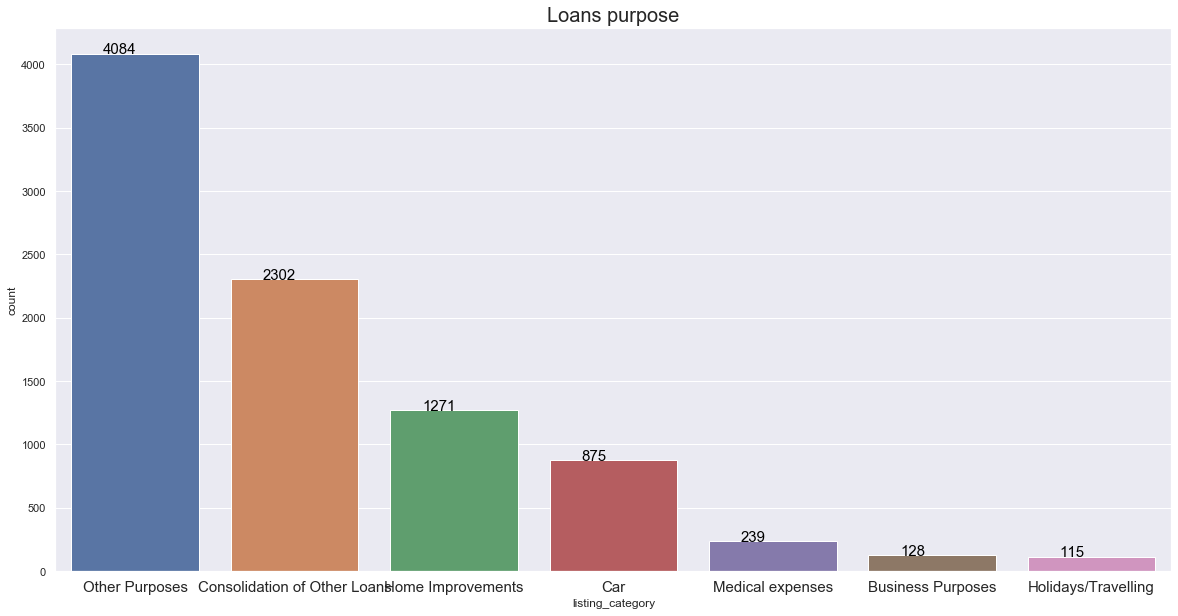

In [6]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='listing_category',data=df,order=df['listing_category'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans purpose", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')

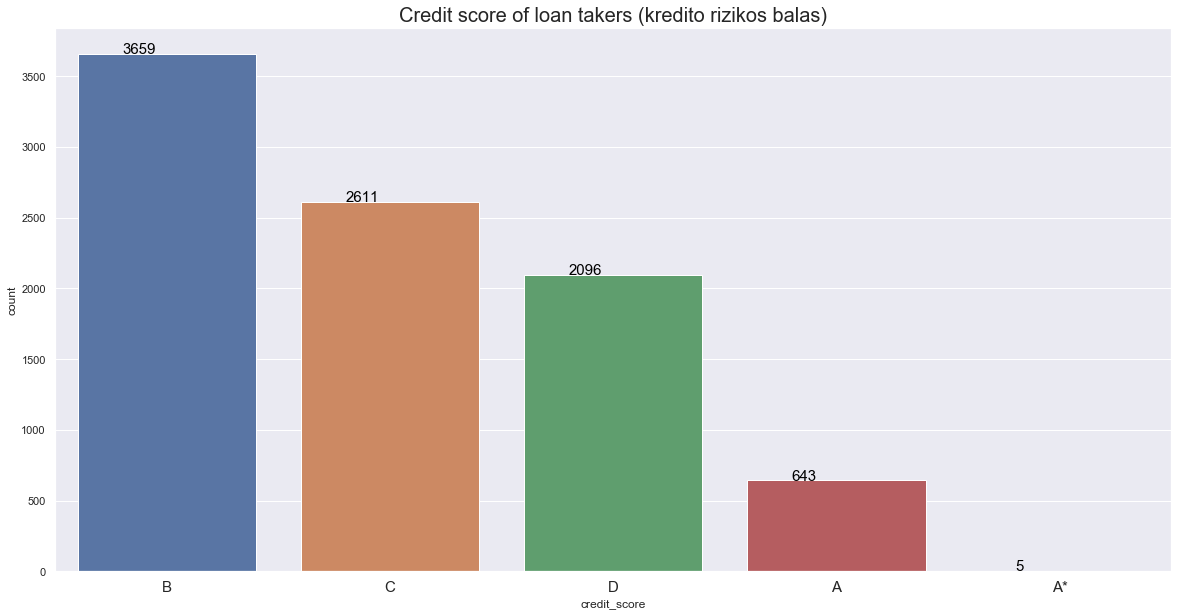

In [7]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='credit_score',data=df,order=df['credit_score'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Credit score of loan takers (kredito rizikos balas)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')

### Loan amount range & Loan period range

Text(0.5, 1.0, 'Loan period range')

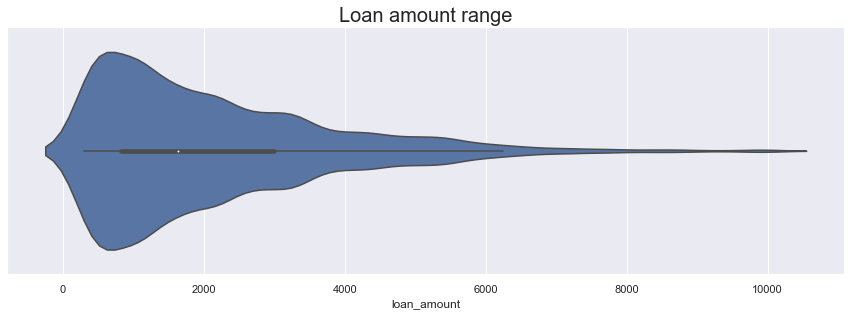

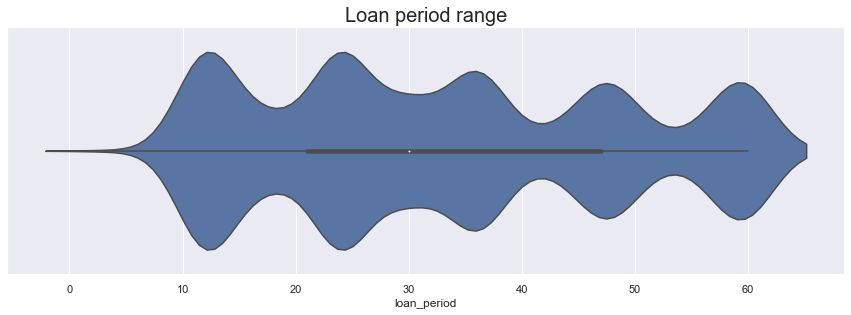

In [8]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
ax = sns.violinplot(x='loan_amount', data=df,) 
ax.set_title('Loan amount range', fontsize=20)

plt.figure(figsize=(15,10))
plt.subplot(2,1,2)
ax2 = sns.violinplot(x='loan_period', data=df,) 
ax2.set_title('Loan period range', fontsize=20)

Text(0.5, 1.0, 'Loan rate')

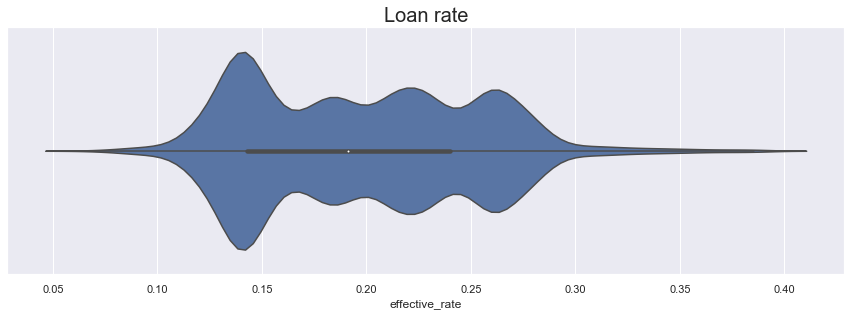

In [9]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
ax = sns.violinplot(x='effective_rate', data=df,) 
ax.set_title('Loan rate', fontsize=20)

Text(0.5, 1.0, 'monthly_installment')

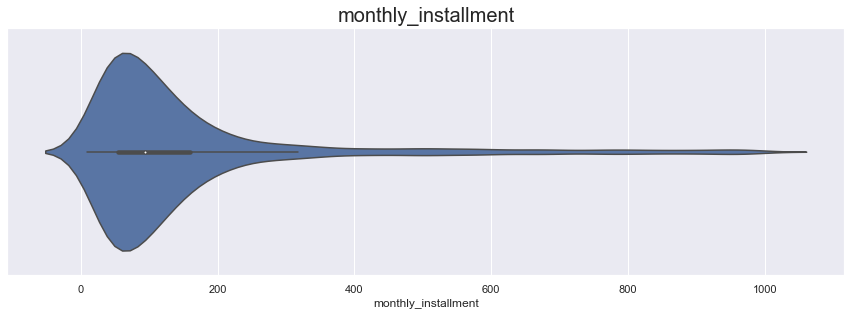

In [10]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
ax = sns.violinplot(x='monthly_installment', data=df[df['monthly_installment'] < 1000], showfliers=False) 
ax.set_title('monthly_installment', fontsize=20)

### Loan status - % of good and bad loans

Text(0.5, 1.0, 'Loan status Default or ok')

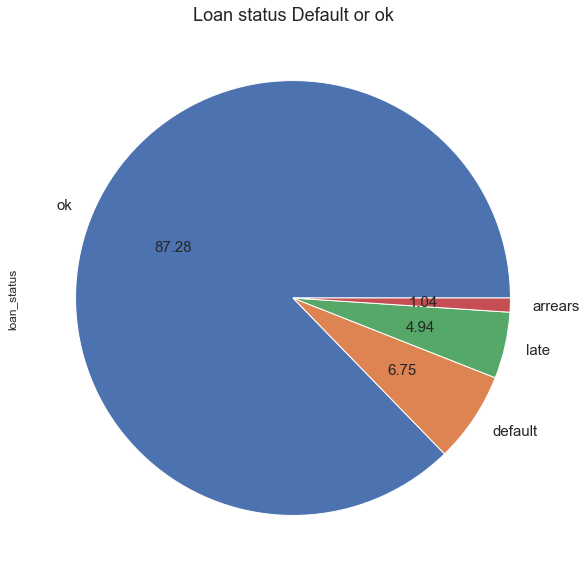

In [12]:
plt.figure(figsize=(20,10))
df['loan_status'].value_counts().plot.pie(autopct='%.2f', fontsize=15).set_title("Loan status Default or ok", fontsize=18 )

Text(0.5, 1.0, 'Burrowers by Genders ')

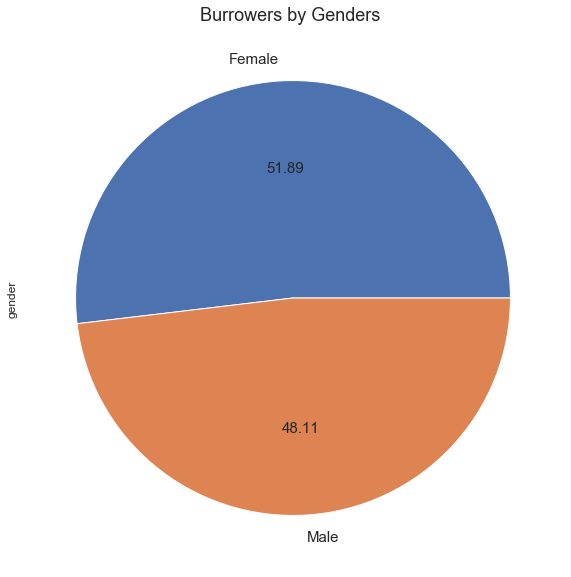

In [13]:
plt.figure(figsize=(20,10))
df['gender'].value_counts().plot.pie(autopct='%.2f', fontsize=15).set_title("Burrowers by Genders ", fontsize=18 )

gender
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

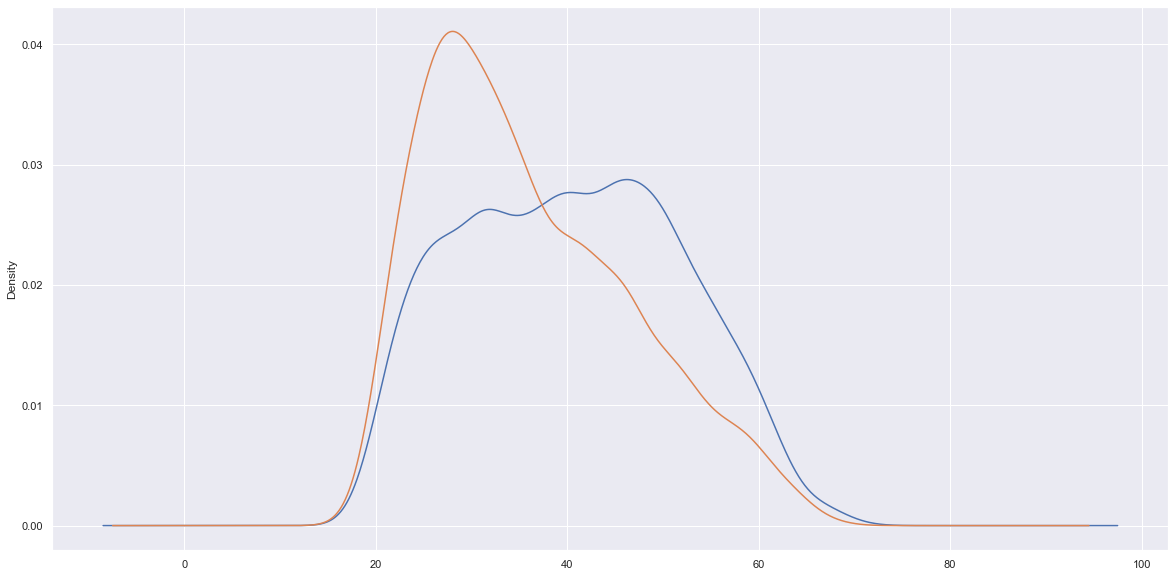

In [14]:
plt.figure(figsize=(20,10))
df.groupby('gender').age.plot(kind='kde')

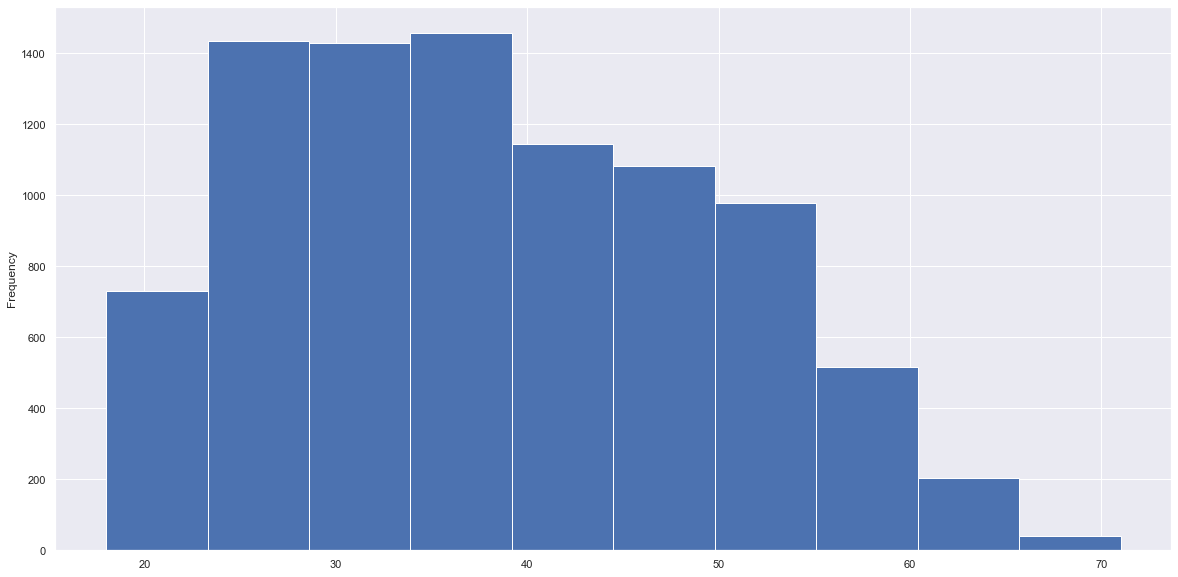

In [15]:
plt.figure(figsize=(20,10))
df['age'].plot.hist()

In [16]:
df.head()

,listing_id,creation_date,loan_paid_date,first_installement_date,loan_paid_status,confirm_status,username,listing_title,listing_category,credit_score,job_loss_insurance,loan_amount,loan_period,effective_rate,preferred_rate,amount_outstanding,monthly_installment,principal_repaid,interest_paid,arrears,loan_status,type,gender,post_town,age,education,employment_status,occupation,employ_how_long,years_working_in_total,dependants,marital_status,credit_check_date,monthly_income,monthly_expenses,available_income,dti,outstanding_debts,last_debt_date
0,32692,2019-09-04,2019-09-05,2019-10-05,1,1,Raimonda98,"""32692-Automobiliui",Car,D,0,3305,36,0.26,0.26,3305.0,150.63,0.0,0.0,0.0,ok,FR,Female,Prienų r.,21,Vocational education,Employed,Rušiuotojas / Sorting operator,6,3,0,Single,2019-09-04 00:00:00,503,0,503,0.2995,0,-
1,32691,2019-09-04,2019-09-05,2019-10-05,1,1,bkar,"""32691-Vartojimui",Other Purposes,D,0,1900,36,0.26,0.26,1900.0,86.59,0.0,0.0,0.0,ok,FR,Male,Joniškio r.,25,Vocational education,Employed,Mechanikas / Mechanic,3,4,0,Single,2019-09-04 00:00:00,345,17,328,0.3003,0,2018-01-04 00:00:00
2,32687,2019-09-04,2019-09-05,2019-10-05,1,1,vl771013,"""32687-Vartojimui",Other Purposes,C,0,665,12,0.19,0.19,665.0,63.79,0.0,0.0,0.0,ok,FR,Female,Vilnius,41,Graduate,Employed,Vadybininkė / Manager,60,6,1,Married,2019-09-04 00:00:00,1060,197,863,0.2460,0,2016-11-30 00:00:00
3,32674,2019-09-04,2019-09-04,2019-10-04,1,1,karturas,"""32674-Vartojimui",Other Purposes,B,0,1040,12,0.13,0.13,1040.0,96.26,0.0,0.0,0.0,ok,FR,Male,Vilnius,26,High school,Employed,Vairuotojas / Driver,36,7,1,Married,2019-09-04 00:00:00,484,0,484,0.1989,0,-
4,32666,2019-09-04,2019-09-05,2019-10-05,1,1,RasaMeska,"""32666-Vartojimui",Other Purposes,B,0,2830,24,0.13,0.13,2830.0,143.81,0.0,0.0,0.0,ok,FR,Female,Panevėžys,33,Post graduate,Employed,Socialinė darbuotoja / Social worker,15,3,2,Married,2019-09-04 00:00:00,849,21,828,0.1941,0,-


In [17]:
target = 'credit_score'
features = ['loan_amount','loan_period','effective_rate','monthly_installment','gender',
            'post_town','age','education','employment_status','occupation','employ_how_long',
            'years_working_in_total','marital_status','monthly_income','monthly_expenses',
            'available_income','dti','outstanding_debts']

In [18]:
df.loan_status.unique()

array(['ok', 'late', 'arrears', 'default'], dtype=object)

In [19]:
default_df = df[df.loan_status == 'default' ]

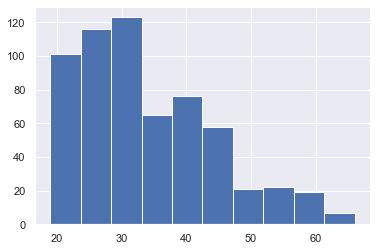

In [20]:
default_df.age.hist()

In [21]:
#Latest defaulted
'2019-06-01'

'2019-06-01'

In [22]:
default_df.head()

,listing_id,creation_date,loan_paid_date,first_installement_date,loan_paid_status,confirm_status,username,listing_title,listing_category,credit_score,job_loss_insurance,loan_amount,loan_period,effective_rate,preferred_rate,amount_outstanding,monthly_installment,principal_repaid,interest_paid,arrears,loan_status,type,gender,post_town,age,education,employment_status,occupation,employ_how_long,years_working_in_total,dependants,marital_status,credit_check_date,monthly_income,monthly_expenses,available_income,dti,outstanding_debts,last_debt_date
804,28085,2019-06-01,2019-06-03,2019-07-02,1,1,Kestas1997,"""28085-Automobilis",Car,D,0,1655,45,0.27,0.27,1655.0,68.10,0.0,0.0,204.30,default,FR,Male,Balbieriškis,22,Vocational education,Employed,Technikos priežiūros darbuotojas / Maintenance...,9,3,0,Single,2019-06-01 00:00:00,393,79,314,0.3743,0,-
816,28025,2019-05-31,2019-06-04,2019-07-03,1,1,Exceler,"""28025-Vartojimui",Other Purposes,B,0,1500,39,0.15,0.15,1500.0,54.05,0.0,0.0,162.15,default,FR,Male,Šiauliai,29,Vocational education,Employed,Sandėlio darbuotojas / Warehouse worker,3,8,0,Single,2019-05-31 00:00:00,415,108,307,0.3905,0,-
953,27295,2019-05-16,2019-05-21,2019-06-21,1,1,Rytutissss,"""27295-Pirkiniui",Home Improvements,D,0,2755,30,0.26,0.26,2755.0,139.95,0.0,0.0,419.85,default,FR,Male,Elektrėnai,20,High school,Employed,Pagalbinis darbuotojas / Assistant worker,3,1,0,Single,2019-05-16 00:00:00,692,0,692,0.2022,0,-
963,27241,2019-05-15,2019-05-20,2019-06-20,1,1,egidijus99,"""27241-Vartojimui",Other Purposes,D,0,1655,24,0.25,0.25,1655.0,96.50,0.0,0.0,289.50,default,FR,Male,Klaipėda,20,High school,Employed,Darbuotojas / Worker,3,1,0,Single,2019-05-15 00:00:00,506,0,506,0.1907,0,2019-04-11 00:00:00
976,27168,2019-05-14,2019-05-15,2019-06-15,1,1,Irmantas93,"""27168-Pirkiniui",Other Purposes,C,0,1655,28,0.21,0.21,1655.0,81.86,0.0,0.0,245.58,default,FR,Male,Elektrėnai,26,High school,Employed,Montuotojas / Installer,6,7,2,Married,2019-05-14 00:00:00,424,0,424,0.1931,0,2017-03-17 00:00:00
